In [1]:
#@title The MIT License (MIT)
#
# Copyright (c) 2025 Eric dos Santos.
#
# Permission is hereby granted, free of charge, to any person obtaining a copy
# of this software and associated documentation files (the "Software"), to deal
# in the Software without restriction, including without limitation the rights
# to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
# copies of the Software, and to permit persons to whom the Software is
# furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
# AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
# OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
# THE SOFTWARE.

# Case Study: Customer Segmentation for Marketing with K-means

In this case study, I will use the **K-means** algorithm to segment customers of a retail company and help it better target its marketing campaigns. The dataset contains information about customers' age, annual income, and spending score. Based on this data, I will apply K-means to identify groups of customers with similar behaviors.


<table class="tfo-notebook-buttons" align="center">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/ericshantos/playground/blob/main/projects/client_marketing/client_marketingclustering.ipynb
"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run on Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/ericshantos/playground/blob/main/projects/client_marketing/client_marketingclustering.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View the code on GitHub</a>
  </td>
</table>

## Loading data

In [2]:
import kagglehub
import pandas as pd

# Download latest version
file_path = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python", "Mall_Customers.csv")

In [3]:
df = pd.read_csv(file_path)

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Exploratory Data Analysis (EDA)

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
print("Number of null values: ", df.isnull().sum().sum())
print("Number of duplicate values: ", df.duplicated().sum())

Number of null values:  0
Number of duplicate values:  0


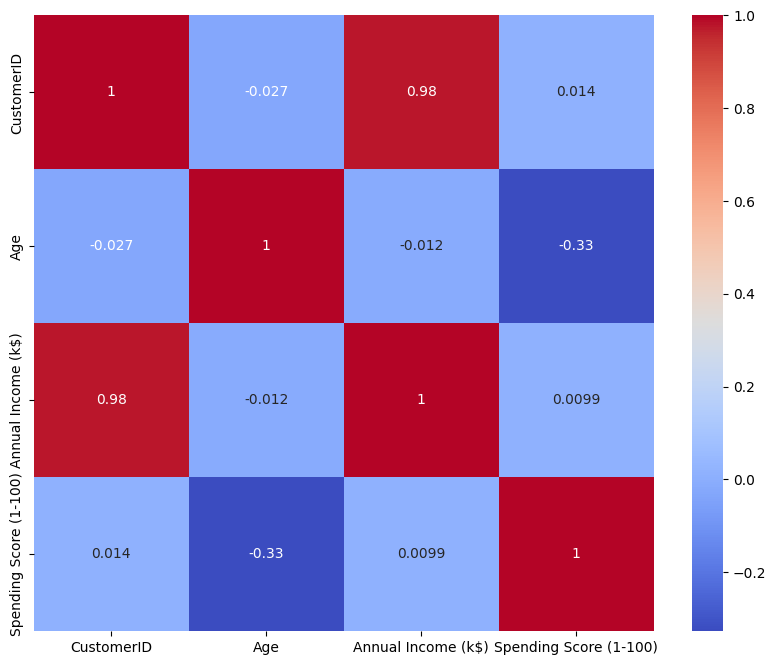

In [9]:
# Correlation of variables
df_numerical = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 8))
sns.heatmap(df_numerical.corr(), annot=True, cmap='coolwarm')
plt.show()

## Data preprocessing

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
df_preprocessing = df.copy()

- Data normalization

In [12]:
df_preprocessing['Gender'] = df_preprocessing['Gender'].map({'Male': 0, 'Female': 1})

- Discarding irrelevant variables

In [13]:
df_preprocessing.drop(columns='CustomerID', inplace=True)

- Remove outliers

In [14]:
#from sklearn.neighbors import LocalOutlierFactor

#lof = LocalOutlierFactor()
#outliers = lof.fit_predict(df_preprocessing)
#df = df_preprocessing[outliers != -1]

- Data normalization

In [15]:
data_normalized = StandardScaler().fit_transform(df_preprocessing)
df_preprocessing = pd.DataFrame(data_normalized, columns=df_preprocessing.columns)

## Clustering

In [16]:
from sklearn.cluster import KMeans

In [17]:
# Target feature
X = df_preprocessing[['Annual Income (k$)', 'Spending Score (1-100)']]

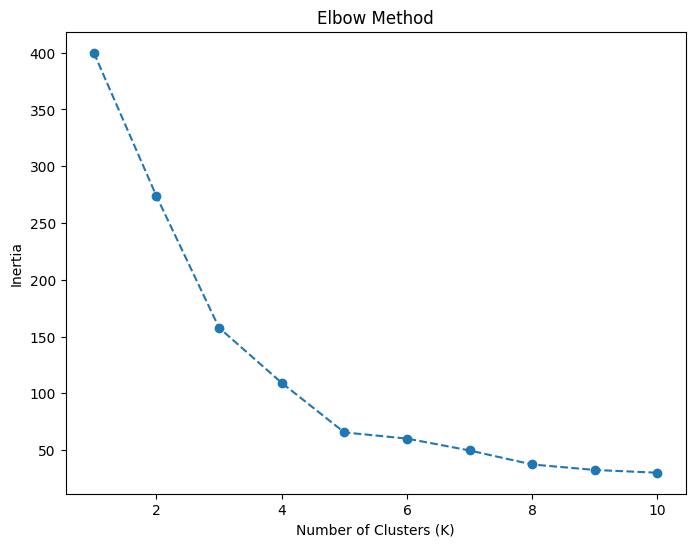

In [18]:
# List to store inertia values ​​for different values ​​of K
inertia = []

# Test K values ​​from 1 to 10
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method Graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

### Applying the K-means algorithm

In [19]:
import numpy as np
from sklearn.cluster import KMeans

# Set the number of clusters
k_means = KMeans(n_clusters=5, init='k-means++', random_state=42)

# Fit the model to the data
k_means.fit(X)

# Get the centroids of the clusters
centroids = k_means.cluster_centers_

# Get the labels of each point
labels = k_means.labels_

df['cluster'] = labels

In [20]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


### Viewing results

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

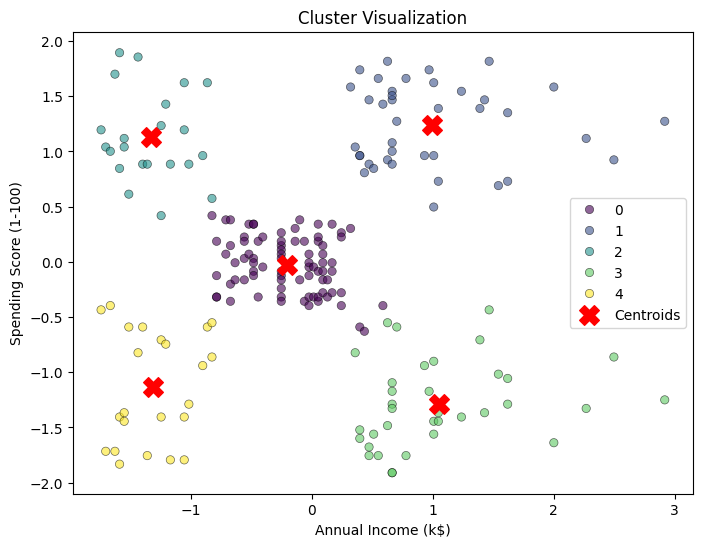

In [22]:
# Create 2D map view
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=labels, palette='viridis', alpha=0.6, edgecolor='k')

# Highlight cluster centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')

# Chart settings
plt.title("Cluster Visualization")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()

### Assessment

In [23]:
from sklearn.metrics import silhouette_score

In [24]:
# Calculating the average silhouette score
silhouette_avg = silhouette_score(X, labels)
print(f"Average Silhouette Index: {silhouette_avg:.4f}")

Average Silhouette Index: 0.5547
